In [112]:
import pandas as pd
import numpy as np
import warnings

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns


In [114]:
warnings.filterwarnings("ignore", category=FutureWarning)

##### Importing the Dataset

In [115]:
customers_df = pd.read_csv("customer_segmentation.csv")

In [116]:
customers_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [117]:
customers_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [118]:
customers_df.shape

(2240, 29)

In [119]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### Checking for Null Values

In [120]:
customers_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

##### Dropping the Rows with Null Values

In [121]:
customers_df.dropna(inplace = True)

In [122]:
customers_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##### Checking the unique values of 'Education' and 'Marital_Status'

In [123]:
customers_df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [124]:
customers_df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

##### Data Preprocessing

1. Changing the datatype of 'Dt_Customer' from object to datetime64[ns]

In [125]:
customers_df['Dt_Customer'] = pd.to_datetime(customers_df['Dt_Customer'], dayfirst = True)

2. Adding a column 'Age' using Year_of_Birth

In [126]:
customers_df['Age'] = 2025 - customers_df['Year_Birth']

3. Adding a column 'Total_Children' by adding the values of Kidhome and Teenhome

In [127]:
customers_df['Total_Children'] = customers_df['Kidhome'] + customers_df['Teenhome']

4. Calculating the total spending of each customer

In [128]:
spend_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

customers_df['Total_Spending'] = customers_df[spend_cols].sum(axis = 1)

In [129]:
customers_df[['Total_Spending']]

,Total_Spending
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


5. Calculating the Customer Tenure

In [130]:
customers_df['Customer_Since'] = (pd.Timestamp('today') - customers_df['Dt_Customer']).dt.days

In [131]:
customers_df['Customer_Since']

0       4735
1       4185
2       4384
3       4211
4       4233
        ... 
2235    4453
2236    4091
2237    4227
2238    4228
2239    4694
Name: Customer_Since, Length: 2216, dtype: int64

##### Exploratory Data Analysis

1. Age Distribution

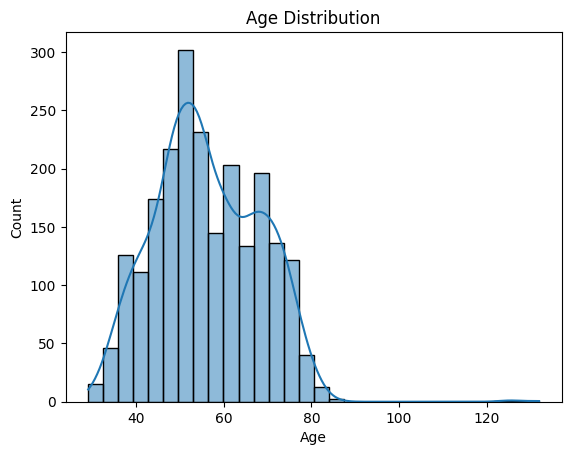

In [132]:
sns.histplot(customers_df['Age'], bins = 30, kde = True)
plt.title('Age Distribution')
plt.show()

2. Income Distribution

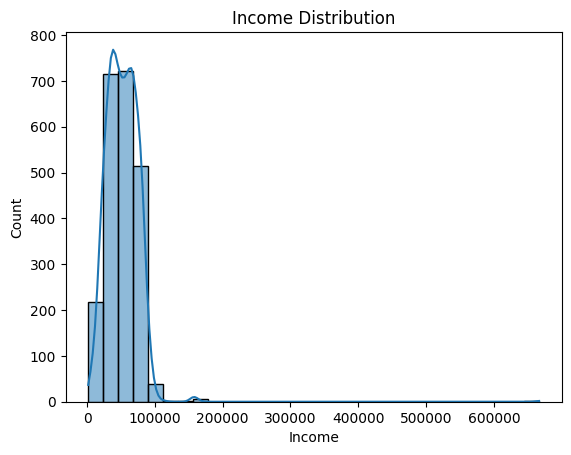

In [133]:
sns.histplot(customers_df['Income'], bins = 30, kde = True)
plt.title('Income Distribution')
plt.show()

3. Spending Distribution <br> Spending is more tilted towards the left meaning lesser the amount spent, more the count

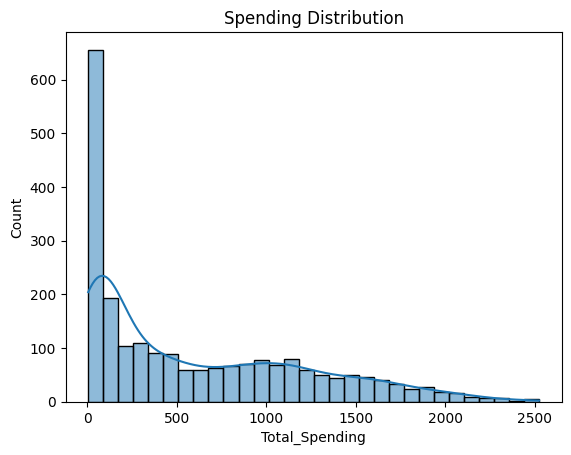

In [134]:
sns.histplot(customers_df['Total_Spending'], bins = 30, kde = True)
plt.title('Spending Distribution')
plt.show()

4. Comparing Education and Income 

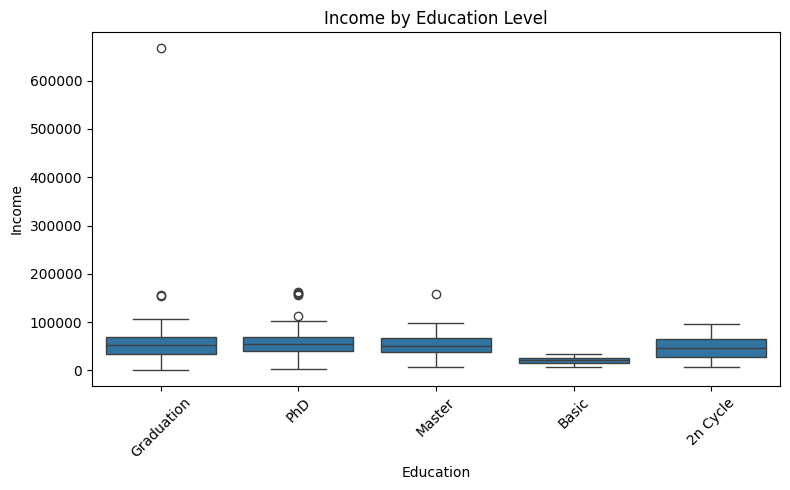

In [135]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Education', y='Income', data=customers_df)
plt.xticks(rotation=45)
plt.title('Income by Education Level')
plt.tight_layout()
plt.show()

5. Comparing Marital Status and Total Spending

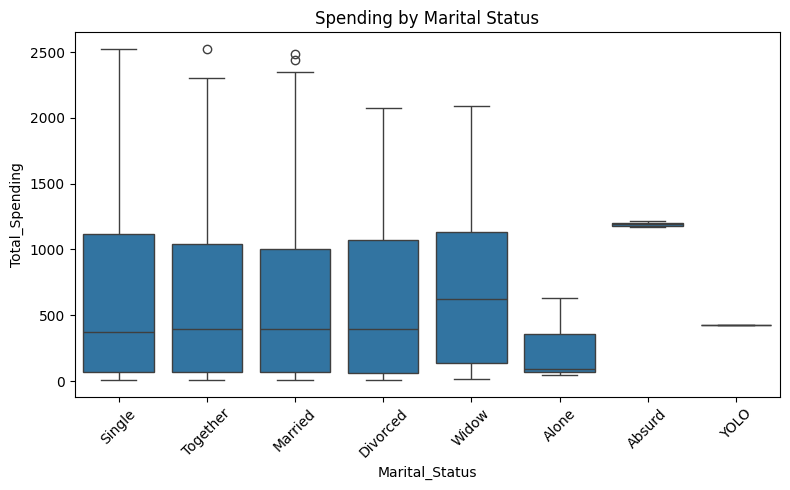

In [136]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Marital_Status', y='Total_Spending', data=customers_df)
plt.xticks(rotation=45)
plt.title('Spending by Marital Status')
plt.tight_layout()
plt.show()

6. Correlation Heatmap

In [137]:
corr = customers_df[['Income', 'Age', 'Recency', 'Total_Spending', 'NumWebPurchases', 'NumStorePurchases']].corr()

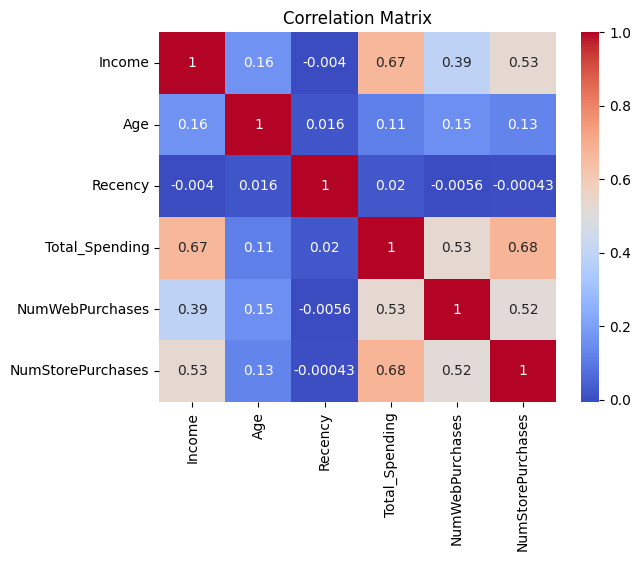

In [138]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [139]:
pivot_income = customers_df.pivot_table(values = 'Income', index = 'Education', columns = 'Marital_Status', aggfunc = 'mean')

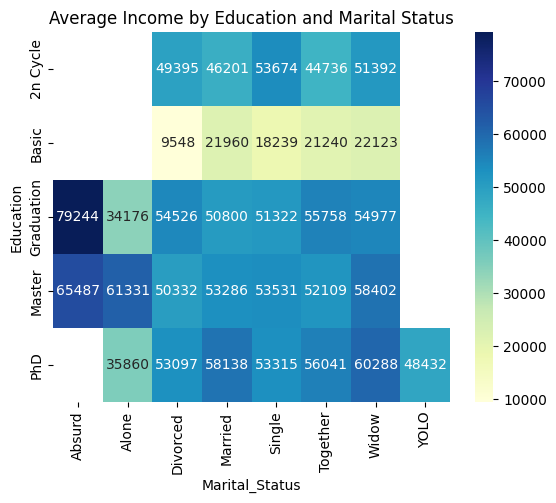

In [140]:
sns.heatmap(pivot_income, annot = True, fmt = '.0f', cmap = 'YlGnBu')
plt.title('Average Income by Education and Marital Status')
plt.show()

7. Average Spending by Education

In [141]:
avg_spending_by_education = (
    customers_df.groupby('Education')['Total_Spending']
    .mean()
    .sort_values(ascending=False)
)

avg_spending_by_education

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

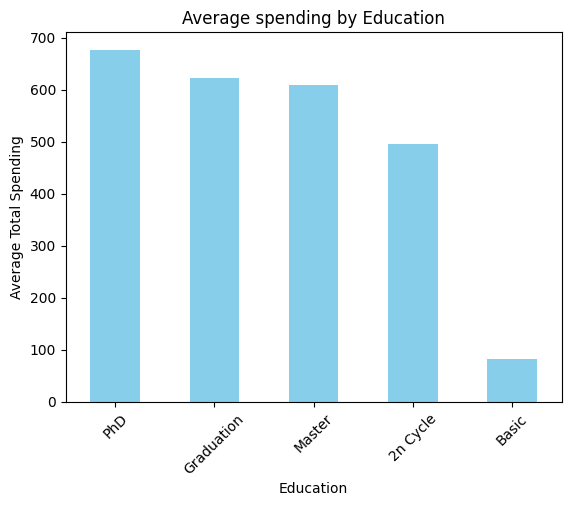

In [142]:
avg_spending_by_education.plot(kind = 'bar', color = 'skyblue')
plt.title('Average spending by Education')
plt.ylabel('Average Total Spending')
plt.xticks(rotation = 45)
plt.show()

8. Campaign acceptance rate by Marital Status

In [143]:
customers_df['AcceptedAny'] = customers_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis = 1)

In [144]:
customers_df['AcceptedAny'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [145]:
customers_df['AcceptedAny'] = customers_df['AcceptedAny'].apply(lambda x: 1 if x > 0 else 0)

In [146]:
customers_df['AcceptedAny'].unique()

array([1, 0], dtype=int64)

In [147]:
avg_acceptance_by_marital_status = (
    customers_df.groupby('Marital_Status')['AcceptedAny']
    .mean()
    .sort_values(ascending=False)
)

avg_acceptance_by_marital_status

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

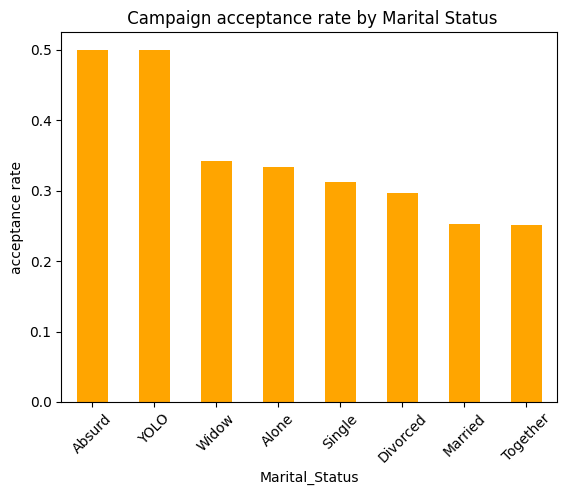

In [148]:
avg_acceptance_by_marital_status.plot(kind = 'bar', color = 'orange')
plt.title(' Campaign acceptance rate by Marital Status')
plt.ylabel('acceptance rate')
plt.xticks(rotation = 45)
plt.show()

9. Average Income by Age Groups

In [154]:
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

In [155]:
customers_df['Age_Group'] = pd.cut(customers_df['Age'], bins = bins, labels = labels)

In [156]:
customers_df['Age_Group']

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: Age_Group, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [157]:
avg_age_by_income = customers_df.groupby('Age_Group')['Income'].mean()

In [158]:
avg_age_by_income

Age_Group
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

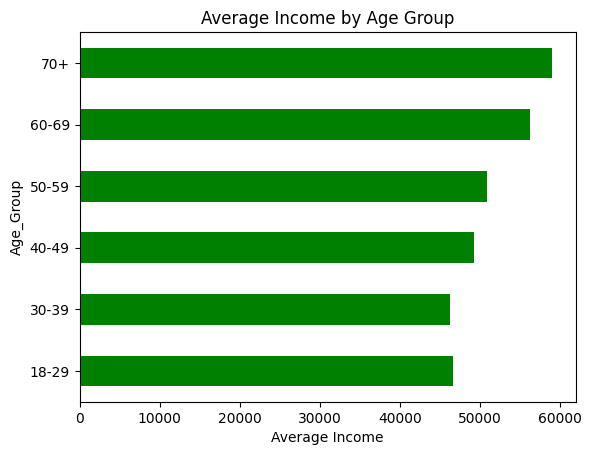

In [163]:
avg_age_by_income.plot(kind = 'barh', color = 'green')
plt.title('Average Income by Age Group')
plt.xlabel("Average Income")
plt.show()

##### Segmentation

1. Lets take the columns: Age, Income, Total_Spending, NumWebPurchases, NumStorePurchases, NumWebVisitsMonth, Recency

In [164]:
segmentation_features = ['Age', 'Income', 'Total_Spending', 'NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']
